In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#dimension of one input image to the discriminator
input_dim = 784

#dimension of noise vector to the generator
noise_dim = 50

#number of neurons in the hidden layer of the discriminator
neuron_dim = 128

mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
def weight_initialize(size):
    dim = size[0]
    stdev = 1. / tf.sqrt(dim / 2.)
    return tf.random_normal(shape=size, stddev=stdev)

# input to the discriminator
# None is used to automatically adjust according to bumber of input images in a batch
X = tf.placeholder(tf.float32, shape=[None, input_dim])

# Weights are intitialized between the first hidden layer and the input layer
# Shape --> input_dim x neuron_dim
Disc_W1 = tf.Variable(weight_initialize([input_dim, neuron_dim]))
# Biases are intialized to zeros
Disc_b1 = tf.Variable(tf.zeros(shape=[neuron_dim]))

# Weights are intialized between hidden layer and output node
# Shape --> neuron_dim x 1
Disc_W2 = tf.Variable(weight_initialize([neuron_dim, 1]))
# Biases are intialized to zeros
Disc_b2 = tf.Variable(tf.zeros(shape=[1]))

# Discriminator variable
var_D = [Disc_W1, Disc_W2, Disc_b1, Disc_b2]

# input noise to the generator
z = tf.placeholder(tf.float32, shape=[None, noise_dim])

# Weights are intialized between noise layer and first hidden layer
# Shape --> noise_dim x neuron_dim
Genr_W1 = tf.Variable(weight_initialize([noise_dim, neuron_dim]))
# Biases are intialized to zeros
Genr_b1 = tf.Variable(tf.zeros(shape=[neuron_dim]))

# Weights are intialized between hidden layer and output layer (generated image)
# Shape --> neuron_dim x input_dim
Genr_W2 = tf.Variable(weight_initialize([neuron_dim, input_dim]))
# Biases are intialized to zeros
Genr_b2 = tf.Variable(tf.zeros(shape=[input_dim]))

# Generator variable
var_G = [Genr_W1, Genr_W2, Genr_b1, Genr_b2]

def generator(z):
    # [None, noise_dim] x [noise_dim, neuron_dim] = None, neuron_dim
    Genr_h = tf.nn.relu(tf.matmul(z, Genr_W1) + Genr_b1)
    # [None, neuron_dim] x [neuron_dim, input_dim] = None, input_dim
    Genr_log_prob = tf.matmul(Genr_h, Genr_W2) + Genr_b2
    Genr_prob = tf.nn.sigmoid(Genr_log_prob)
    return Genr_prob

def discriminator(x):
    # [None, input_dim] x [input_dim, neuron_dim] = None, neuron_dim
    Disc_h = tf.nn.relu(tf.matmul(x, Disc_W1) + Disc_b1)
    # [None, neuron_dim] x [neuron_dim, 1] = None, 1
    Disc_log_prob = tf.matmul(Disc_h, Disc_W2) + Disc_b2
    return Disc_log_prob

In [4]:
G_sample = generator(z)
D_real = discriminator(X)
D_fake = discriminator(G_sample)

# Mean loss for entire batch
D_loss = tf.reduce_mean(D_real) - tf.reduce_mean(D_fake) # Maximize this
G_loss = -tf.reduce_mean(D_fake) # Minimize this

D_solver = (tf.train.RMSPropOptimizer(learning_rate=0.0001).minimize(-D_loss, var_list=var_D))
G_solver = (tf.train.RMSPropOptimizer(learning_rate=0.0001).minimize(G_loss, var_list=var_G))

clip_D = [p.assign(tf.clip_by_value(p, -0.01, 0.01)) for p in var_D]

batch_size = 50

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Loop: 0, Generator_loss: 0.009601, Discriminator_loss: 0.012191


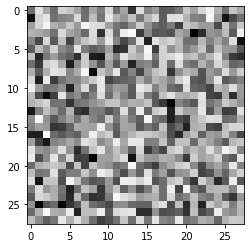

Loop: 100, Generator_loss: 1.7497, Discriminator_loss: 2.075
Loop: 200, Generator_loss: 1.5378, Discriminator_loss: 1.9407
Loop: 300, Generator_loss: 1.1795, Discriminator_loss: 1.5898
Loop: 400, Generator_loss: 0.9473, Discriminator_loss: 1.3311
Loop: 500, Generator_loss: 0.92658, Discriminator_loss: 1.0042
Loop: 600, Generator_loss: 0.76892, Discriminator_loss: 0.63734
Loop: 700, Generator_loss: 0.58843, Discriminator_loss: 0.42136
Loop: 800, Generator_loss: 0.25562, Discriminator_loss: 0.22293
Loop: 900, Generator_loss: 0.12929, Discriminator_loss: 0.11575
Loop: 1000, Generator_loss: 0.017083, Discriminator_loss: 0.062388


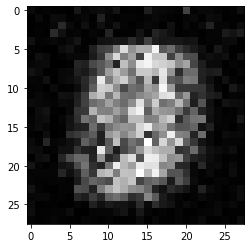

Loop: 1100, Generator_loss: -0.0045981, Discriminator_loss: 0.038236
Loop: 1200, Generator_loss: 0.026003, Discriminator_loss: 0.019309
Loop: 1300, Generator_loss: -0.030295, Discriminator_loss: 0.0091519
Loop: 1400, Generator_loss: -0.028718, Discriminator_loss: 0.0025094
Loop: 1500, Generator_loss: 0.035428, Discriminator_loss: -0.0025501
Loop: 1600, Generator_loss: -0.044834, Discriminator_loss: 0.0023902
Loop: 1700, Generator_loss: 0.078901, Discriminator_loss: -0.0039525
Loop: 1800, Generator_loss: 0.022995, Discriminator_loss: 0.0018111
Loop: 1900, Generator_loss: 0.0022329, Discriminator_loss: -0.0016923
Loop: 2000, Generator_loss: 0.034993, Discriminator_loss: -0.0021733


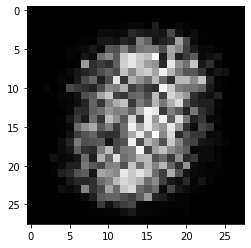

Loop: 2100, Generator_loss: 0.049875, Discriminator_loss: -0.0012658
Loop: 2200, Generator_loss: -0.064109, Discriminator_loss: 0.00066108
Loop: 2300, Generator_loss: -0.034958, Discriminator_loss: 0.0016985
Loop: 2400, Generator_loss: 0.037632, Discriminator_loss: -0.010365
Loop: 2500, Generator_loss: 0.1557, Discriminator_loss: 0.0042197
Loop: 2600, Generator_loss: 0.089906, Discriminator_loss: 0.00078677
Loop: 2700, Generator_loss: -0.058179, Discriminator_loss: -0.0025078
Loop: 2800, Generator_loss: 0.097948, Discriminator_loss: -0.0041388
Loop: 2900, Generator_loss: -0.0326, Discriminator_loss: -0.002461
Loop: 3000, Generator_loss: 0.0076316, Discriminator_loss: -0.0010565


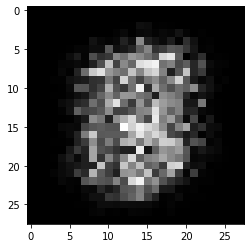

Loop: 3100, Generator_loss: 0.010449, Discriminator_loss: -0.0021301
Loop: 3200, Generator_loss: 0.086605, Discriminator_loss: 0.0039644
Loop: 3300, Generator_loss: -0.05872, Discriminator_loss: 0.0011287
Loop: 3400, Generator_loss: -0.030151, Discriminator_loss: -0.00016886
Loop: 3500, Generator_loss: -0.042758, Discriminator_loss: -0.0030777
Loop: 3600, Generator_loss: 0.019889, Discriminator_loss: 0.001173
Loop: 3700, Generator_loss: -0.10192, Discriminator_loss: 0.0020893
Loop: 3800, Generator_loss: 0.11013, Discriminator_loss: -0.0061245
Loop: 3900, Generator_loss: 0.080649, Discriminator_loss: 0.0044011
Loop: 4000, Generator_loss: 0.096437, Discriminator_loss: 0.0045594


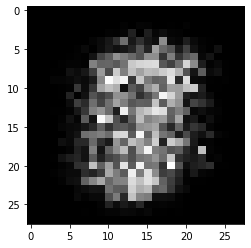

Loop: 4100, Generator_loss: 0.030609, Discriminator_loss: 0.0028036
Loop: 4200, Generator_loss: 0.022977, Discriminator_loss: 0.0026679
Loop: 4300, Generator_loss: -0.019212, Discriminator_loss: 0.0025002
Loop: 4400, Generator_loss: 0.049895, Discriminator_loss: -0.0010263
Loop: 4500, Generator_loss: 0.0085076, Discriminator_loss: 0.0064815
Loop: 4600, Generator_loss: 0.052784, Discriminator_loss: 0.013076
Loop: 4700, Generator_loss: -0.0026915, Discriminator_loss: 0.0092554
Loop: 4800, Generator_loss: -0.077089, Discriminator_loss: 0.0029985
Loop: 4900, Generator_loss: 0.032464, Discriminator_loss: 0.025372
Loop: 5000, Generator_loss: -0.0048708, Discriminator_loss: 0.024737


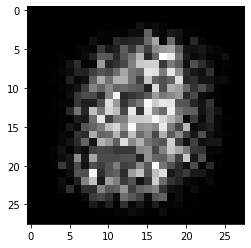

Loop: 5100, Generator_loss: 0.056474, Discriminator_loss: 0.026954
Loop: 5200, Generator_loss: -0.020213, Discriminator_loss: 0.029182
Loop: 5300, Generator_loss: 0.0088095, Discriminator_loss: 0.035308
Loop: 5400, Generator_loss: 0.016321, Discriminator_loss: 0.032019
Loop: 5500, Generator_loss: 0.016411, Discriminator_loss: 0.028478
Loop: 5600, Generator_loss: -0.040712, Discriminator_loss: 0.027835
Loop: 5700, Generator_loss: -0.0020619, Discriminator_loss: 0.022609
Loop: 5800, Generator_loss: -0.014022, Discriminator_loss: 0.028989
Loop: 5900, Generator_loss: 0.0034617, Discriminator_loss: 0.031653
Loop: 6000, Generator_loss: -0.00017149, Discriminator_loss: 0.033087


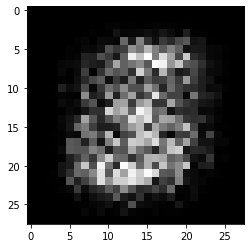

Loop: 6100, Generator_loss: -0.022921, Discriminator_loss: 0.036384
Loop: 6200, Generator_loss: -0.0068457, Discriminator_loss: 0.042209
Loop: 6300, Generator_loss: -0.017235, Discriminator_loss: 0.041524
Loop: 6400, Generator_loss: 0.0044033, Discriminator_loss: 0.070421
Loop: 6500, Generator_loss: -0.010153, Discriminator_loss: 0.074724
Loop: 6600, Generator_loss: -0.0094834, Discriminator_loss: 0.055675
Loop: 6700, Generator_loss: -0.014843, Discriminator_loss: 0.05239
Loop: 6800, Generator_loss: -0.0051681, Discriminator_loss: 0.046967
Loop: 6900, Generator_loss: -0.017261, Discriminator_loss: 0.046681
Loop: 7000, Generator_loss: -0.023033, Discriminator_loss: 0.046211


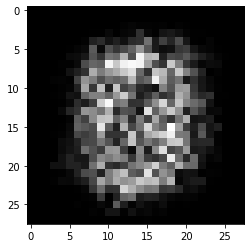

Loop: 7100, Generator_loss: -0.015701, Discriminator_loss: 0.048849
Loop: 7200, Generator_loss: -0.018839, Discriminator_loss: 0.046228
Loop: 7300, Generator_loss: -0.0055731, Discriminator_loss: 0.051131
Loop: 7400, Generator_loss: -0.0079905, Discriminator_loss: 0.055298
Loop: 7500, Generator_loss: -0.0087163, Discriminator_loss: 0.04765
Loop: 7600, Generator_loss: -0.020557, Discriminator_loss: 0.039014
Loop: 7700, Generator_loss: -0.0052967, Discriminator_loss: 0.044514
Loop: 7800, Generator_loss: -0.0060701, Discriminator_loss: 0.036819
Loop: 7900, Generator_loss: -0.0021125, Discriminator_loss: 0.042687
Loop: 8000, Generator_loss: -0.0043884, Discriminator_loss: 0.039106


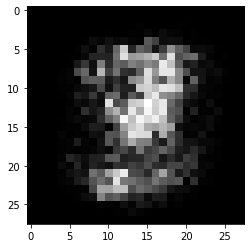

Loop: 8100, Generator_loss: -0.0051445, Discriminator_loss: 0.030165
Loop: 8200, Generator_loss: -0.0077958, Discriminator_loss: 0.035163
Loop: 8300, Generator_loss: -0.011024, Discriminator_loss: 0.030002
Loop: 8400, Generator_loss: -0.0079704, Discriminator_loss: 0.033287
Loop: 8500, Generator_loss: -0.0032727, Discriminator_loss: 0.034248
Loop: 8600, Generator_loss: -0.0099142, Discriminator_loss: 0.039055
Loop: 8700, Generator_loss: -0.021808, Discriminator_loss: 0.035105
Loop: 8800, Generator_loss: 0.01509, Discriminator_loss: 0.034513
Loop: 8900, Generator_loss: -0.01158, Discriminator_loss: 0.03444
Loop: 9000, Generator_loss: -0.0021015, Discriminator_loss: 0.029593


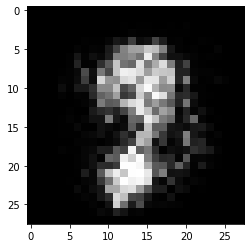

Loop: 9100, Generator_loss: -0.021143, Discriminator_loss: 0.031835
Loop: 9200, Generator_loss: -0.0065337, Discriminator_loss: 0.034675
Loop: 9300, Generator_loss: -0.0048018, Discriminator_loss: 0.032954
Loop: 9400, Generator_loss: -0.0054542, Discriminator_loss: 0.035671
Loop: 9500, Generator_loss: -0.016515, Discriminator_loss: 0.030096
Loop: 9600, Generator_loss: -0.028391, Discriminator_loss: 0.034586
Loop: 9700, Generator_loss: -0.018494, Discriminator_loss: 0.031058
Loop: 9800, Generator_loss: -0.019489, Discriminator_loss: 0.026182
Loop: 9900, Generator_loss: -0.013013, Discriminator_loss: 0.033965
Loop: 10000, Generator_loss: -0.019585, Discriminator_loss: 0.028451


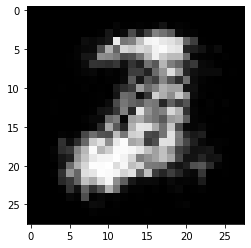

Loop: 10100, Generator_loss: -0.0025827, Discriminator_loss: 0.03186
Loop: 10200, Generator_loss: -0.011526, Discriminator_loss: 0.026303
Loop: 10300, Generator_loss: -0.015749, Discriminator_loss: 0.02594
Loop: 10400, Generator_loss: -0.023988, Discriminator_loss: 0.026934
Loop: 10500, Generator_loss: 0.0056229, Discriminator_loss: 0.028567
Loop: 10600, Generator_loss: -0.013214, Discriminator_loss: 0.027106
Loop: 10700, Generator_loss: -0.015677, Discriminator_loss: 0.027749
Loop: 10800, Generator_loss: 0.0010574, Discriminator_loss: 0.021765
Loop: 10900, Generator_loss: -0.017172, Discriminator_loss: 0.026201
Loop: 11000, Generator_loss: -0.01127, Discriminator_loss: 0.023846


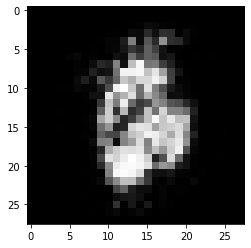

Loop: 11100, Generator_loss: -0.0051027, Discriminator_loss: 0.028807
Loop: 11200, Generator_loss: -0.010776, Discriminator_loss: 0.022516
Loop: 11300, Generator_loss: -0.017013, Discriminator_loss: 0.022864
Loop: 11400, Generator_loss: -0.016639, Discriminator_loss: 0.024745
Loop: 11500, Generator_loss: -0.0040271, Discriminator_loss: 0.020243
Loop: 11600, Generator_loss: -0.010515, Discriminator_loss: 0.024892
Loop: 11700, Generator_loss: -0.0038297, Discriminator_loss: 0.026674
Loop: 11800, Generator_loss: 0.0009101, Discriminator_loss: 0.028
Loop: 11900, Generator_loss: -0.011451, Discriminator_loss: 0.026792
Loop: 12000, Generator_loss: -0.010298, Discriminator_loss: 0.019597


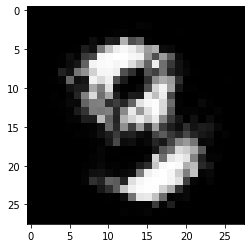

Loop: 12100, Generator_loss: -0.0033964, Discriminator_loss: 0.020196
Loop: 12200, Generator_loss: -0.012817, Discriminator_loss: 0.021905
Loop: 12300, Generator_loss: -0.010262, Discriminator_loss: 0.022207
Loop: 12400, Generator_loss: 0.00352, Discriminator_loss: 0.017055
Loop: 12500, Generator_loss: -0.01851, Discriminator_loss: 0.020252
Loop: 12600, Generator_loss: -0.007828, Discriminator_loss: 0.019895
Loop: 12700, Generator_loss: -0.0023359, Discriminator_loss: 0.02135
Loop: 12800, Generator_loss: -0.0071693, Discriminator_loss: 0.019423
Loop: 12900, Generator_loss: -0.0037952, Discriminator_loss: 0.020538
Loop: 13000, Generator_loss: -0.0033047, Discriminator_loss: 0.020025


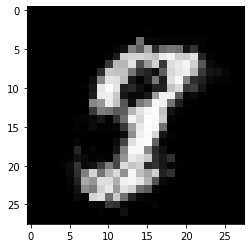

Loop: 13100, Generator_loss: -0.013072, Discriminator_loss: 0.01986
Loop: 13200, Generator_loss: -0.0044957, Discriminator_loss: 0.020994
Loop: 13300, Generator_loss: -0.010051, Discriminator_loss: 0.015282
Loop: 13400, Generator_loss: -0.0059476, Discriminator_loss: 0.019817
Loop: 13500, Generator_loss: -0.0090817, Discriminator_loss: 0.019859
Loop: 13600, Generator_loss: -0.013256, Discriminator_loss: 0.021706
Loop: 13700, Generator_loss: -0.012281, Discriminator_loss: 0.025003
Loop: 13800, Generator_loss: -8.5566e-05, Discriminator_loss: 0.021222
Loop: 13900, Generator_loss: -0.017636, Discriminator_loss: 0.026191
Loop: 14000, Generator_loss: -0.009917, Discriminator_loss: 0.017187


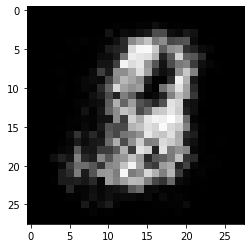

Loop: 14100, Generator_loss: -0.009769, Discriminator_loss: 0.019045
Loop: 14200, Generator_loss: -0.010069, Discriminator_loss: 0.018188
Loop: 14300, Generator_loss: -0.023772, Discriminator_loss: 0.024686
Loop: 14400, Generator_loss: 0.018963, Discriminator_loss: 0.025107
Loop: 14500, Generator_loss: -0.015751, Discriminator_loss: 0.016728
Loop: 14600, Generator_loss: -0.0029256, Discriminator_loss: 0.020131
Loop: 14700, Generator_loss: -0.0042144, Discriminator_loss: 0.02093
Loop: 14800, Generator_loss: -0.00552, Discriminator_loss: 0.017213
Loop: 14900, Generator_loss: -0.017437, Discriminator_loss: 0.016105
Loop: 15000, Generator_loss: -0.0027239, Discriminator_loss: 0.017663


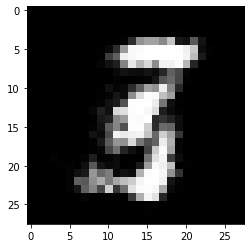

Loop: 15100, Generator_loss: -0.01992, Discriminator_loss: 0.018478
Loop: 15200, Generator_loss: -0.0097102, Discriminator_loss: 0.018369
Loop: 15300, Generator_loss: -0.01881, Discriminator_loss: 0.019597
Loop: 15400, Generator_loss: -0.0088254, Discriminator_loss: 0.012194
Loop: 15500, Generator_loss: -0.0054085, Discriminator_loss: 0.01509
Loop: 15600, Generator_loss: -0.013496, Discriminator_loss: 0.014851
Loop: 15700, Generator_loss: -0.01147, Discriminator_loss: 0.01538
Loop: 15800, Generator_loss: -0.0021443, Discriminator_loss: 0.017162
Loop: 15900, Generator_loss: -0.013123, Discriminator_loss: 0.016103
Loop: 16000, Generator_loss: 0.0028539, Discriminator_loss: 0.015727


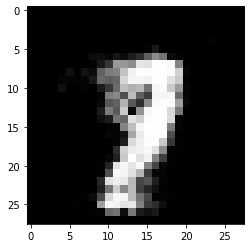

Loop: 16100, Generator_loss: -0.014708, Discriminator_loss: 0.015832
Loop: 16200, Generator_loss: -0.0080362, Discriminator_loss: 0.016136
Loop: 16300, Generator_loss: -0.013229, Discriminator_loss: 0.014751
Loop: 16400, Generator_loss: -0.010591, Discriminator_loss: 0.021229
Loop: 16500, Generator_loss: -0.01587, Discriminator_loss: 0.021079
Loop: 16600, Generator_loss: -0.011248, Discriminator_loss: 0.016776
Loop: 16700, Generator_loss: -0.0050803, Discriminator_loss: 0.016431
Loop: 16800, Generator_loss: -0.012883, Discriminator_loss: 0.017651
Loop: 16900, Generator_loss: -0.0021218, Discriminator_loss: 0.018983
Loop: 17000, Generator_loss: -0.019442, Discriminator_loss: 0.018855


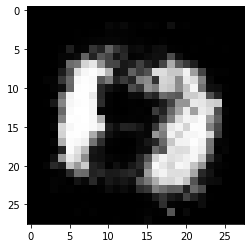

Loop: 17100, Generator_loss: -0.011368, Discriminator_loss: 0.01455
Loop: 17200, Generator_loss: -0.012622, Discriminator_loss: 0.019713
Loop: 17300, Generator_loss: -0.0095019, Discriminator_loss: 0.018008
Loop: 17400, Generator_loss: -0.011704, Discriminator_loss: 0.017927
Loop: 17500, Generator_loss: -0.011273, Discriminator_loss: 0.014343
Loop: 17600, Generator_loss: -0.0039966, Discriminator_loss: 0.015059
Loop: 17700, Generator_loss: -0.0037232, Discriminator_loss: 0.014447
Loop: 17800, Generator_loss: -0.010556, Discriminator_loss: 0.012639
Loop: 17900, Generator_loss: -0.0069177, Discriminator_loss: 0.011516
Loop: 18000, Generator_loss: -0.013073, Discriminator_loss: 0.014249


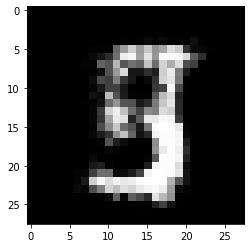

Loop: 18100, Generator_loss: -0.0163, Discriminator_loss: 0.011685
Loop: 18200, Generator_loss: -0.0047841, Discriminator_loss: 0.013941
Loop: 18300, Generator_loss: -0.0015842, Discriminator_loss: 0.012811
Loop: 18400, Generator_loss: -0.0088174, Discriminator_loss: 0.014186
Loop: 18500, Generator_loss: -0.009826, Discriminator_loss: 0.012977
Loop: 18600, Generator_loss: 0.0031722, Discriminator_loss: 0.011404
Loop: 18700, Generator_loss: -0.021634, Discriminator_loss: 0.014418
Loop: 18800, Generator_loss: -0.011494, Discriminator_loss: 0.013009
Loop: 18900, Generator_loss: -0.010437, Discriminator_loss: 0.012822
Loop: 19000, Generator_loss: -0.0036369, Discriminator_loss: 0.011312


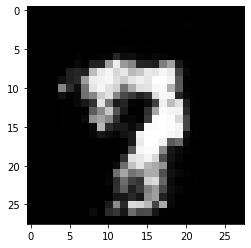

Loop: 19100, Generator_loss: -0.011361, Discriminator_loss: 0.014137
Loop: 19200, Generator_loss: -0.0089026, Discriminator_loss: 0.012529
Loop: 19300, Generator_loss: -0.0042262, Discriminator_loss: 0.017852
Loop: 19400, Generator_loss: -0.020635, Discriminator_loss: 0.014023
Loop: 19500, Generator_loss: -0.015426, Discriminator_loss: 0.012088
Loop: 19600, Generator_loss: -0.0024551, Discriminator_loss: 0.013988
Loop: 19700, Generator_loss: -0.014853, Discriminator_loss: 0.011991
Loop: 19800, Generator_loss: -0.022054, Discriminator_loss: 0.014894
Loop: 19900, Generator_loss: -0.0044123, Discriminator_loss: 0.014399
Loop: 20000, Generator_loss: -0.015107, Discriminator_loss: 0.012156


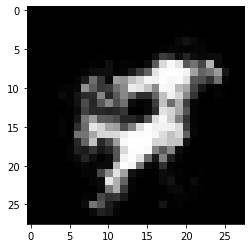

Loop: 20100, Generator_loss: -0.01576, Discriminator_loss: 0.014465
Loop: 20200, Generator_loss: -0.0087208, Discriminator_loss: 0.01319
Loop: 20300, Generator_loss: -0.0079288, Discriminator_loss: 0.011293
Loop: 20400, Generator_loss: -0.011502, Discriminator_loss: 0.011371
Loop: 20500, Generator_loss: -0.0079857, Discriminator_loss: 0.010405
Loop: 20600, Generator_loss: -0.018543, Discriminator_loss: 0.01062
Loop: 20700, Generator_loss: -0.0025848, Discriminator_loss: 0.0086312
Loop: 20800, Generator_loss: -0.011731, Discriminator_loss: 0.01053
Loop: 20900, Generator_loss: -0.015111, Discriminator_loss: 0.011282
Loop: 21000, Generator_loss: 0.0037506, Discriminator_loss: 0.01658


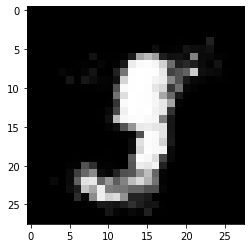

Loop: 21100, Generator_loss: -0.009427, Discriminator_loss: 0.011976
Loop: 21200, Generator_loss: -0.017684, Discriminator_loss: 0.01324
Loop: 21300, Generator_loss: -0.0023907, Discriminator_loss: 0.013844
Loop: 21400, Generator_loss: -0.012388, Discriminator_loss: 0.0092522
Loop: 21500, Generator_loss: -0.00079629, Discriminator_loss: 0.00868
Loop: 21600, Generator_loss: -0.023833, Discriminator_loss: 0.010491
Loop: 21700, Generator_loss: 0.0040936, Discriminator_loss: 0.010682
Loop: 21800, Generator_loss: -0.010837, Discriminator_loss: 0.011071
Loop: 21900, Generator_loss: 0.0014621, Discriminator_loss: 0.011209
Loop: 22000, Generator_loss: -0.017518, Discriminator_loss: 0.011851


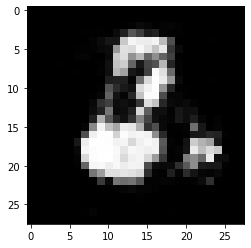

Loop: 22100, Generator_loss: -0.022391, Discriminator_loss: 0.012336
Loop: 22200, Generator_loss: -0.02645, Discriminator_loss: 0.011615
Loop: 22300, Generator_loss: -0.0013044, Discriminator_loss: 0.011759
Loop: 22400, Generator_loss: -0.017044, Discriminator_loss: 0.012382
Loop: 22500, Generator_loss: -0.0015449, Discriminator_loss: 0.01236
Loop: 22600, Generator_loss: 0.0074618, Discriminator_loss: 0.010441
Loop: 22700, Generator_loss: -0.012653, Discriminator_loss: 0.012403
Loop: 22800, Generator_loss: -0.015759, Discriminator_loss: 0.012526
Loop: 22900, Generator_loss: -0.002647, Discriminator_loss: 0.0097728
Loop: 23000, Generator_loss: -0.0016259, Discriminator_loss: 0.01192


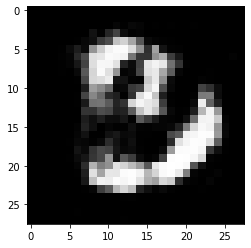

Loop: 23100, Generator_loss: -0.0040264, Discriminator_loss: 0.01268
Loop: 23200, Generator_loss: -0.020117, Discriminator_loss: 0.010877
Loop: 23300, Generator_loss: -0.0084853, Discriminator_loss: 0.010056
Loop: 23400, Generator_loss: -0.0091757, Discriminator_loss: 0.010136
Loop: 23500, Generator_loss: -0.018301, Discriminator_loss: 0.010364
Loop: 23600, Generator_loss: -0.0030176, Discriminator_loss: 0.011
Loop: 23700, Generator_loss: -0.0075302, Discriminator_loss: 0.0092075
Loop: 23800, Generator_loss: -0.0059908, Discriminator_loss: 0.0084136
Loop: 23900, Generator_loss: -0.021456, Discriminator_loss: 0.010148
Loop: 24000, Generator_loss: -0.0086136, Discriminator_loss: 0.010373


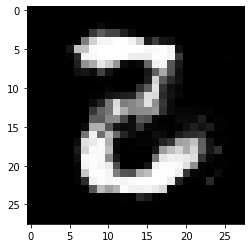

Loop: 24100, Generator_loss: -0.029008, Discriminator_loss: 0.009583
Loop: 24200, Generator_loss: -0.010556, Discriminator_loss: 0.011495
Loop: 24300, Generator_loss: -0.0047137, Discriminator_loss: 0.0080924
Loop: 24400, Generator_loss: -0.016532, Discriminator_loss: 0.0071475
Loop: 24500, Generator_loss: -0.0094263, Discriminator_loss: 0.008932
Loop: 24600, Generator_loss: -0.013076, Discriminator_loss: 0.010754
Loop: 24700, Generator_loss: -0.0069255, Discriminator_loss: 0.014677
Loop: 24800, Generator_loss: -0.018184, Discriminator_loss: 0.0097933
Loop: 24900, Generator_loss: -0.019994, Discriminator_loss: 0.0081025
Loop: 25000, Generator_loss: -0.000642, Discriminator_loss: 0.012587


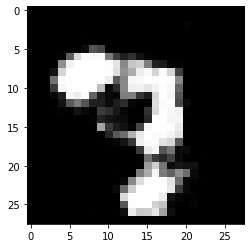

Loop: 25100, Generator_loss: -0.010666, Discriminator_loss: 0.0086896
Loop: 25200, Generator_loss: -0.020105, Discriminator_loss: 0.013241
Loop: 25300, Generator_loss: -0.013521, Discriminator_loss: 0.012429
Loop: 25400, Generator_loss: -0.018288, Discriminator_loss: 0.011201
Loop: 25500, Generator_loss: -0.017694, Discriminator_loss: 0.011494
Loop: 25600, Generator_loss: -0.02205, Discriminator_loss: 0.0083511
Loop: 25700, Generator_loss: -0.014537, Discriminator_loss: 0.0093828
Loop: 25800, Generator_loss: -0.006861, Discriminator_loss: 0.0081357
Loop: 25900, Generator_loss: -0.010634, Discriminator_loss: 0.010642
Loop: 26000, Generator_loss: -0.014564, Discriminator_loss: 0.011361


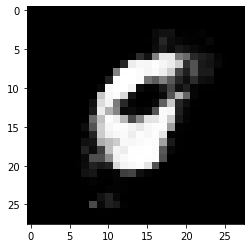

Loop: 26100, Generator_loss: 0.003232, Discriminator_loss: 0.008025
Loop: 26200, Generator_loss: -0.01228, Discriminator_loss: 0.010943
Loop: 26300, Generator_loss: -0.0089432, Discriminator_loss: 0.011923
Loop: 26400, Generator_loss: 0.0034942, Discriminator_loss: 0.0089507
Loop: 26500, Generator_loss: -0.012838, Discriminator_loss: 0.0092717
Loop: 26600, Generator_loss: -0.0085672, Discriminator_loss: 0.010451
Loop: 26700, Generator_loss: -0.01101, Discriminator_loss: 0.0059439
Loop: 26800, Generator_loss: -0.013185, Discriminator_loss: 0.0088712
Loop: 26900, Generator_loss: -0.023252, Discriminator_loss: 0.0083453
Loop: 27000, Generator_loss: -0.0025148, Discriminator_loss: 0.012756


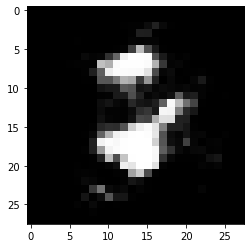

Loop: 27100, Generator_loss: -0.0016344, Discriminator_loss: 0.011912
Loop: 27200, Generator_loss: 0.017769, Discriminator_loss: 0.010405
Loop: 27300, Generator_loss: -0.0096922, Discriminator_loss: 0.0099377
Loop: 27400, Generator_loss: -0.0068345, Discriminator_loss: 0.0091904
Loop: 27500, Generator_loss: -0.014184, Discriminator_loss: 0.0093785
Loop: 27600, Generator_loss: -0.014807, Discriminator_loss: 0.012216
Loop: 27700, Generator_loss: 0.0013374, Discriminator_loss: 0.0092304
Loop: 27800, Generator_loss: -0.01815, Discriminator_loss: 0.011478
Loop: 27900, Generator_loss: -0.023664, Discriminator_loss: 0.011959
Loop: 28000, Generator_loss: -0.013764, Discriminator_loss: 0.011134


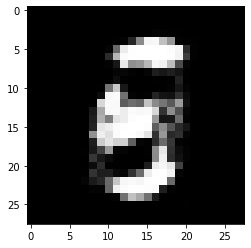

Loop: 28100, Generator_loss: 0.0028763, Discriminator_loss: 0.0091085
Loop: 28200, Generator_loss: -0.0069491, Discriminator_loss: 0.0087627
Loop: 28300, Generator_loss: -0.0094061, Discriminator_loss: 0.0096162
Loop: 28400, Generator_loss: -0.0051266, Discriminator_loss: 0.011823
Loop: 28500, Generator_loss: -0.0092058, Discriminator_loss: 0.010504
Loop: 28600, Generator_loss: -0.010512, Discriminator_loss: 0.0083332
Loop: 28700, Generator_loss: -0.017115, Discriminator_loss: 0.013398
Loop: 28800, Generator_loss: -0.00023596, Discriminator_loss: 0.0059268
Loop: 28900, Generator_loss: -0.01305, Discriminator_loss: 0.0065162
Loop: 29000, Generator_loss: -0.020928, Discriminator_loss: 0.010356


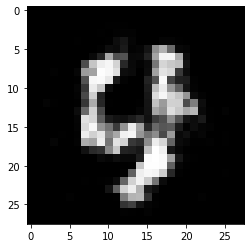

Loop: 29100, Generator_loss: -0.012761, Discriminator_loss: 0.010496
Loop: 29200, Generator_loss: -0.013725, Discriminator_loss: 0.0068102
Loop: 29300, Generator_loss: -0.0011021, Discriminator_loss: 0.0090291
Loop: 29400, Generator_loss: -0.0079375, Discriminator_loss: 0.0086969
Loop: 29500, Generator_loss: -0.014535, Discriminator_loss: 0.0091827
Loop: 29600, Generator_loss: 0.00020977, Discriminator_loss: 0.0082648
Loop: 29700, Generator_loss: -0.015923, Discriminator_loss: 0.0087302
Loop: 29800, Generator_loss: -0.0062244, Discriminator_loss: 0.010588
Loop: 29900, Generator_loss: -0.0029554, Discriminator_loss: 0.0096011
Loop: 30000, Generator_loss: -0.015171, Discriminator_loss: 0.0090894


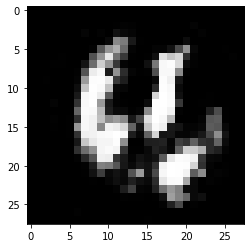

Loop: 30100, Generator_loss: -0.016313, Discriminator_loss: 0.011452
Loop: 30200, Generator_loss: -0.010962, Discriminator_loss: 0.010522
Loop: 30300, Generator_loss: -0.013479, Discriminator_loss: 0.0073368
Loop: 30400, Generator_loss: -0.0049389, Discriminator_loss: 0.0088001
Loop: 30500, Generator_loss: -0.010136, Discriminator_loss: 0.0097807
Loop: 30600, Generator_loss: -0.0199, Discriminator_loss: 0.0075566
Loop: 30700, Generator_loss: -0.015297, Discriminator_loss: 0.011409
Loop: 30800, Generator_loss: -0.011212, Discriminator_loss: 0.0060921
Loop: 30900, Generator_loss: -0.013231, Discriminator_loss: 0.008806
Loop: 31000, Generator_loss: -0.0094415, Discriminator_loss: 0.0083874


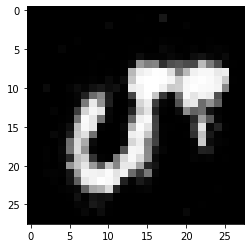

Loop: 31100, Generator_loss: -0.018451, Discriminator_loss: 0.0078687
Loop: 31200, Generator_loss: -0.02425, Discriminator_loss: 0.0066331
Loop: 31300, Generator_loss: -0.018093, Discriminator_loss: 0.009179
Loop: 31400, Generator_loss: -0.028215, Discriminator_loss: 0.0092145
Loop: 31500, Generator_loss: -0.0077565, Discriminator_loss: 0.0089399
Loop: 31600, Generator_loss: 0.010635, Discriminator_loss: 0.0095934
Loop: 31700, Generator_loss: -0.027474, Discriminator_loss: 0.0081603
Loop: 31800, Generator_loss: -0.020316, Discriminator_loss: 0.010191
Loop: 31900, Generator_loss: -0.0047422, Discriminator_loss: 0.011944
Loop: 32000, Generator_loss: -5.9674e-05, Discriminator_loss: 0.0099833


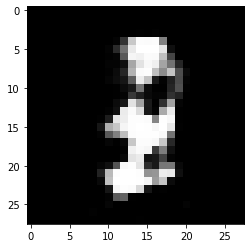

Loop: 32100, Generator_loss: -0.0037588, Discriminator_loss: 0.0084383
Loop: 32200, Generator_loss: -0.011112, Discriminator_loss: 0.0095741
Loop: 32300, Generator_loss: -0.0009354, Discriminator_loss: 0.0049147
Loop: 32400, Generator_loss: 0.00083604, Discriminator_loss: 0.0093271
Loop: 32500, Generator_loss: -0.01556, Discriminator_loss: 0.0077672
Loop: 32600, Generator_loss: -0.0073912, Discriminator_loss: 0.0068206
Loop: 32700, Generator_loss: -0.0099276, Discriminator_loss: 0.010974
Loop: 32800, Generator_loss: -0.012992, Discriminator_loss: 0.011333
Loop: 32900, Generator_loss: -0.0080203, Discriminator_loss: 0.0069489
Loop: 33000, Generator_loss: 0.0041658, Discriminator_loss: 0.0062513


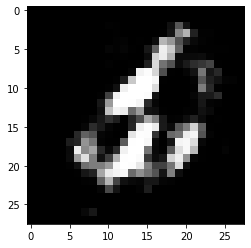

Loop: 33100, Generator_loss: 0.010116, Discriminator_loss: 0.006198
Loop: 33200, Generator_loss: 0.009242, Discriminator_loss: 0.0099889
Loop: 33300, Generator_loss: -0.01979, Discriminator_loss: 0.009517
Loop: 33400, Generator_loss: -0.003616, Discriminator_loss: 0.010838
Loop: 33500, Generator_loss: -0.016595, Discriminator_loss: 0.0063951
Loop: 33600, Generator_loss: -0.0064753, Discriminator_loss: 0.0078213
Loop: 33700, Generator_loss: -0.0083786, Discriminator_loss: 0.008373
Loop: 33800, Generator_loss: -0.018066, Discriminator_loss: 0.0097454
Loop: 33900, Generator_loss: -0.016422, Discriminator_loss: 0.0076037
Loop: 34000, Generator_loss: -0.022215, Discriminator_loss: 0.0081861


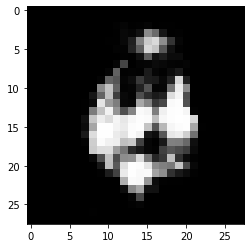

Loop: 34100, Generator_loss: 0.0037882, Discriminator_loss: 0.0086132
Loop: 34200, Generator_loss: -0.0026825, Discriminator_loss: 0.011037
Loop: 34300, Generator_loss: -0.013888, Discriminator_loss: 0.0066298
Loop: 34400, Generator_loss: 0.0013309, Discriminator_loss: 0.0074761
Loop: 34500, Generator_loss: 0.001946, Discriminator_loss: 0.0082154
Loop: 34600, Generator_loss: -0.023816, Discriminator_loss: 0.00976
Loop: 34700, Generator_loss: -0.0252, Discriminator_loss: 0.0082826
Loop: 34800, Generator_loss: 0.0060583, Discriminator_loss: 0.0079772
Loop: 34900, Generator_loss: -0.024534, Discriminator_loss: 0.011506
Loop: 35000, Generator_loss: -0.0057438, Discriminator_loss: 0.0073183


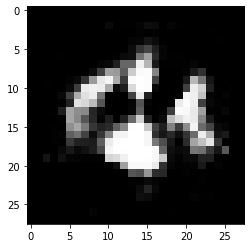

Loop: 35100, Generator_loss: -0.014326, Discriminator_loss: 0.0072731
Loop: 35200, Generator_loss: -0.0057585, Discriminator_loss: 0.012801
Loop: 35300, Generator_loss: -0.0079344, Discriminator_loss: 0.004825
Loop: 35400, Generator_loss: -0.0033637, Discriminator_loss: 0.0076572
Loop: 35500, Generator_loss: 0.0085028, Discriminator_loss: 0.0084623
Loop: 35600, Generator_loss: -0.0058185, Discriminator_loss: 0.009072
Loop: 35700, Generator_loss: -0.016953, Discriminator_loss: 0.010474
Loop: 35800, Generator_loss: -0.028417, Discriminator_loss: 0.0071662
Loop: 35900, Generator_loss: -0.011651, Discriminator_loss: 0.0076014
Loop: 36000, Generator_loss: 0.0066651, Discriminator_loss: 0.0064572


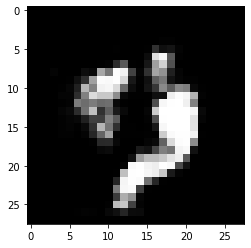

Loop: 36100, Generator_loss: -0.0074129, Discriminator_loss: 0.0057104
Loop: 36200, Generator_loss: -0.021394, Discriminator_loss: 0.0073054
Loop: 36300, Generator_loss: -0.020062, Discriminator_loss: 0.0072483
Loop: 36400, Generator_loss: 0.016644, Discriminator_loss: 0.0094863
Loop: 36500, Generator_loss: -0.018227, Discriminator_loss: 0.0076226
Loop: 36600, Generator_loss: 0.011067, Discriminator_loss: 0.0084648
Loop: 36700, Generator_loss: -0.010039, Discriminator_loss: 0.0090441
Loop: 36800, Generator_loss: -0.012091, Discriminator_loss: 0.001643
Loop: 36900, Generator_loss: -0.016291, Discriminator_loss: 0.0075362
Loop: 37000, Generator_loss: 0.00051972, Discriminator_loss: 0.0098491


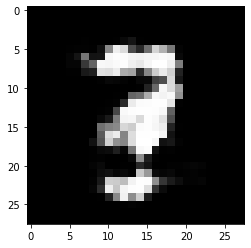

Loop: 37100, Generator_loss: -0.015219, Discriminator_loss: 0.0089923
Loop: 37200, Generator_loss: -0.02532, Discriminator_loss: 0.0070006
Loop: 37300, Generator_loss: -0.018665, Discriminator_loss: 0.010018
Loop: 37400, Generator_loss: -0.0074771, Discriminator_loss: 0.0072848
Loop: 37500, Generator_loss: -0.0010105, Discriminator_loss: 0.0069893
Loop: 37600, Generator_loss: -0.017339, Discriminator_loss: 0.0076674
Loop: 37700, Generator_loss: -0.016427, Discriminator_loss: 0.0094951
Loop: 37800, Generator_loss: -0.01378, Discriminator_loss: 0.0055222
Loop: 37900, Generator_loss: -0.0072239, Discriminator_loss: 0.0088367
Loop: 38000, Generator_loss: -0.010407, Discriminator_loss: 0.004016


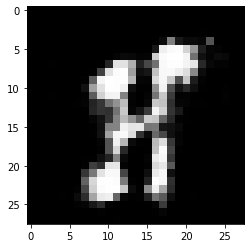

Loop: 38100, Generator_loss: -0.013427, Discriminator_loss: 0.0081121
Loop: 38200, Generator_loss: -0.01787, Discriminator_loss: 0.0053019
Loop: 38300, Generator_loss: 0.0086191, Discriminator_loss: 0.0027741
Loop: 38400, Generator_loss: -0.0088277, Discriminator_loss: 0.0058667
Loop: 38500, Generator_loss: -0.020559, Discriminator_loss: 0.0075322
Loop: 38600, Generator_loss: -0.016018, Discriminator_loss: 0.0067527
Loop: 38700, Generator_loss: -0.011724, Discriminator_loss: 0.0074523
Loop: 38800, Generator_loss: -0.0069166, Discriminator_loss: 0.0067073
Loop: 38900, Generator_loss: -0.011426, Discriminator_loss: 0.0071662
Loop: 39000, Generator_loss: -0.01672, Discriminator_loss: 0.009031


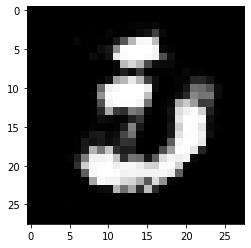

Loop: 39100, Generator_loss: -0.014437, Discriminator_loss: 0.0035717
Loop: 39200, Generator_loss: -0.0098976, Discriminator_loss: 0.010382
Loop: 39300, Generator_loss: -0.013173, Discriminator_loss: 0.0048036
Loop: 39400, Generator_loss: 0.010876, Discriminator_loss: 0.0069773
Loop: 39500, Generator_loss: -0.016055, Discriminator_loss: 0.0045821
Loop: 39600, Generator_loss: -0.016347, Discriminator_loss: 0.0064702
Loop: 39700, Generator_loss: -0.01958, Discriminator_loss: 0.0076864
Loop: 39800, Generator_loss: -0.0039516, Discriminator_loss: 0.010954
Loop: 39900, Generator_loss: -0.014376, Discriminator_loss: 0.0058875
Loop: 40000, Generator_loss: -0.0078749, Discriminator_loss: 0.006671


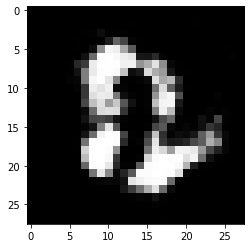

Loop: 40100, Generator_loss: 0.00083831, Discriminator_loss: 0.0053685
Loop: 40200, Generator_loss: -0.019935, Discriminator_loss: 0.0081178
Loop: 40300, Generator_loss: 0.010471, Discriminator_loss: 0.010936
Loop: 40400, Generator_loss: -0.0060879, Discriminator_loss: 0.0093515
Loop: 40500, Generator_loss: -0.016646, Discriminator_loss: 0.0041351
Loop: 40600, Generator_loss: -0.014121, Discriminator_loss: 0.0073157
Loop: 40700, Generator_loss: 0.0016208, Discriminator_loss: 0.0099996
Loop: 40800, Generator_loss: -0.010925, Discriminator_loss: 0.0078274
Loop: 40900, Generator_loss: -0.022971, Discriminator_loss: 0.0069723
Loop: 41000, Generator_loss: -0.011396, Discriminator_loss: 0.0052925


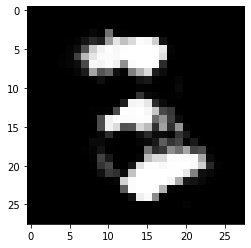

Loop: 41100, Generator_loss: -0.016784, Discriminator_loss: 0.0077667
Loop: 41200, Generator_loss: -0.010623, Discriminator_loss: 0.0077145
Loop: 41300, Generator_loss: 0.0063209, Discriminator_loss: 0.0062723
Loop: 41400, Generator_loss: -0.020128, Discriminator_loss: 0.0068616
Loop: 41500, Generator_loss: -0.019997, Discriminator_loss: 0.00913
Loop: 41600, Generator_loss: 0.0010009, Discriminator_loss: 0.011044
Loop: 41700, Generator_loss: -0.017877, Discriminator_loss: 0.0069719
Loop: 41800, Generator_loss: -0.0086817, Discriminator_loss: 0.0064778
Loop: 41900, Generator_loss: -0.027256, Discriminator_loss: 0.0093966
Loop: 42000, Generator_loss: -0.010956, Discriminator_loss: 0.0061012


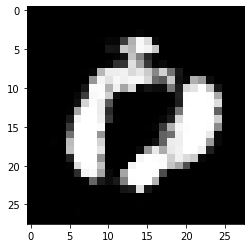

Loop: 42100, Generator_loss: -0.0076722, Discriminator_loss: 0.0066104
Loop: 42200, Generator_loss: -0.014402, Discriminator_loss: 0.0073306
Loop: 42300, Generator_loss: -0.012897, Discriminator_loss: 0.0065831
Loop: 42400, Generator_loss: 0.0044965, Discriminator_loss: 0.006776
Loop: 42500, Generator_loss: -0.028125, Discriminator_loss: 0.010457
Loop: 42600, Generator_loss: -0.0090463, Discriminator_loss: 0.0089697
Loop: 42700, Generator_loss: -0.0077399, Discriminator_loss: 0.0066433
Loop: 42800, Generator_loss: -0.0032432, Discriminator_loss: 0.00665
Loop: 42900, Generator_loss: -0.0035283, Discriminator_loss: 0.0065997
Loop: 43000, Generator_loss: -0.013741, Discriminator_loss: 0.0083941


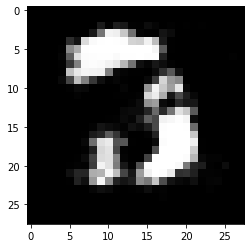

Loop: 43100, Generator_loss: -0.0091077, Discriminator_loss: 0.0062595
Loop: 43200, Generator_loss: -0.0096279, Discriminator_loss: 0.0071783
Loop: 43300, Generator_loss: -0.0027864, Discriminator_loss: 0.0082618
Loop: 43400, Generator_loss: -0.016109, Discriminator_loss: 0.0026267
Loop: 43500, Generator_loss: -0.016753, Discriminator_loss: 0.0035798
Loop: 43600, Generator_loss: 0.0091229, Discriminator_loss: 0.0077973
Loop: 43700, Generator_loss: -0.019996, Discriminator_loss: 0.0065795
Loop: 43800, Generator_loss: -0.011055, Discriminator_loss: 0.0079499
Loop: 43900, Generator_loss: -0.00033661, Discriminator_loss: 0.006264
Loop: 44000, Generator_loss: -0.012349, Discriminator_loss: 0.0048284


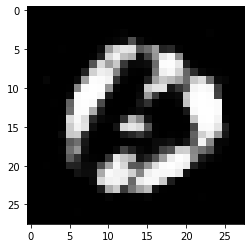

Loop: 44100, Generator_loss: -0.018393, Discriminator_loss: 0.0093965
Loop: 44200, Generator_loss: -0.0076772, Discriminator_loss: 0.0053252
Loop: 44300, Generator_loss: -0.015916, Discriminator_loss: 0.0049294
Loop: 44400, Generator_loss: -0.022699, Discriminator_loss: 0.008104
Loop: 44500, Generator_loss: -0.0075382, Discriminator_loss: 0.0071169
Loop: 44600, Generator_loss: -0.013792, Discriminator_loss: 0.0057884
Loop: 44700, Generator_loss: -0.008109, Discriminator_loss: 0.007888
Loop: 44800, Generator_loss: 0.0010909, Discriminator_loss: 0.0073436
Loop: 44900, Generator_loss: -0.012312, Discriminator_loss: 0.010106
Loop: 45000, Generator_loss: -0.0078105, Discriminator_loss: 0.0075683


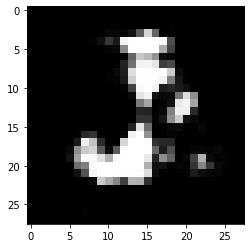

Loop: 45100, Generator_loss: -0.016719, Discriminator_loss: 0.007687
Loop: 45200, Generator_loss: -0.014944, Discriminator_loss: 0.0064974
Loop: 45300, Generator_loss: -0.022587, Discriminator_loss: 0.0043198
Loop: 45400, Generator_loss: -0.012254, Discriminator_loss: 0.0066024
Loop: 45500, Generator_loss: -0.01175, Discriminator_loss: 0.0082111
Loop: 45600, Generator_loss: -0.019816, Discriminator_loss: 0.0083309
Loop: 45700, Generator_loss: -0.0069938, Discriminator_loss: 0.0057425
Loop: 45800, Generator_loss: -0.0067614, Discriminator_loss: 0.0049686
Loop: 45900, Generator_loss: -0.0051983, Discriminator_loss: 0.0088225
Loop: 46000, Generator_loss: -0.013363, Discriminator_loss: 0.0048348


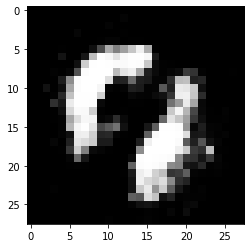

Loop: 46100, Generator_loss: -0.011474, Discriminator_loss: 0.0069816
Loop: 46200, Generator_loss: -0.00016537, Discriminator_loss: 0.0066752
Loop: 46300, Generator_loss: -0.017023, Discriminator_loss: 0.0096749
Loop: 46400, Generator_loss: -0.011596, Discriminator_loss: 0.0073172
Loop: 46500, Generator_loss: -0.0053909, Discriminator_loss: 0.0073946
Loop: 46600, Generator_loss: -0.030192, Discriminator_loss: 0.009073
Loop: 46700, Generator_loss: -0.0093458, Discriminator_loss: 0.0074429
Loop: 46800, Generator_loss: -0.0098881, Discriminator_loss: 0.0035072
Loop: 46900, Generator_loss: 0.0046106, Discriminator_loss: 0.0074604
Loop: 47000, Generator_loss: -0.034052, Discriminator_loss: 0.0047136


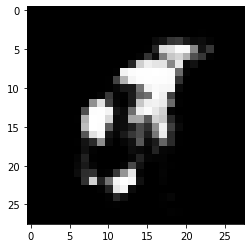

Loop: 47100, Generator_loss: -0.01785, Discriminator_loss: 0.0068188
Loop: 47200, Generator_loss: -0.0048402, Discriminator_loss: 0.0053803
Loop: 47300, Generator_loss: -0.012443, Discriminator_loss: 0.0044102
Loop: 47400, Generator_loss: -0.0032409, Discriminator_loss: 0.0066534
Loop: 47500, Generator_loss: -0.030847, Discriminator_loss: 0.0053901
Loop: 47600, Generator_loss: 0.0059139, Discriminator_loss: 0.0083217
Loop: 47700, Generator_loss: -0.01607, Discriminator_loss: 0.0078053
Loop: 47800, Generator_loss: -0.018304, Discriminator_loss: 0.008232
Loop: 47900, Generator_loss: -0.016227, Discriminator_loss: 0.0052618
Loop: 48000, Generator_loss: -0.015076, Discriminator_loss: 0.0054934


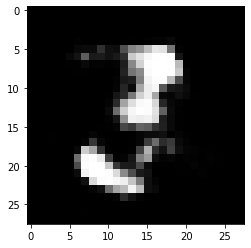

Loop: 48100, Generator_loss: -0.0040849, Discriminator_loss: 0.008818
Loop: 48200, Generator_loss: -0.0021672, Discriminator_loss: 0.00083351
Loop: 48300, Generator_loss: -0.0036483, Discriminator_loss: 0.0041794
Loop: 48400, Generator_loss: -0.011622, Discriminator_loss: 0.0033546
Loop: 48500, Generator_loss: 0.016343, Discriminator_loss: 0.0063195
Loop: 48600, Generator_loss: -0.0036257, Discriminator_loss: 0.0074634
Loop: 48700, Generator_loss: -0.0035702, Discriminator_loss: 0.0040014
Loop: 48800, Generator_loss: 0.0056824, Discriminator_loss: 0.0031553
Loop: 48900, Generator_loss: -0.017059, Discriminator_loss: 0.0084728
Loop: 49000, Generator_loss: -0.018127, Discriminator_loss: 0.0061997


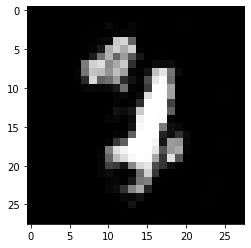

Loop: 49100, Generator_loss: -9.5519e-05, Discriminator_loss: 0.010734
Loop: 49200, Generator_loss: -0.01848, Discriminator_loss: 0.0070402
Loop: 49300, Generator_loss: -0.0049562, Discriminator_loss: 0.0092206
Loop: 49400, Generator_loss: -0.008744, Discriminator_loss: 0.0074831
Loop: 49500, Generator_loss: -0.013975, Discriminator_loss: 0.0073087
Loop: 49600, Generator_loss: 0.00060492, Discriminator_loss: 0.0067524
Loop: 49700, Generator_loss: -0.00093642, Discriminator_loss: 0.0093094
Loop: 49800, Generator_loss: -0.015285, Discriminator_loss: 0.0072003
Loop: 49900, Generator_loss: -0.0029908, Discriminator_loss: 0.0071763


In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

disc_loss = []
genr_loss = []

disc_loss_exp = []
genr_loss_exp = []

saver = tf.train.Saver()
#1000000
for it in range(50000):
    for _ in range(5):
        X_mb, _ = mnist.train.next_batch(batch_size)

        _, D_loss_curr, _ = sess.run(
            [D_solver, D_loss, clip_D],
            feed_dict={X: X_mb, z: np.random.uniform(-1., 1., size=[batch_size, noise_dim])}
        )

    _, G_loss_curr = sess.run(
        [G_solver, G_loss],
        feed_dict={z: np.random.uniform(-1., 1., size=[batch_size, noise_dim])}
    )
    
    disc_loss.append(D_loss_curr)
    genr_loss.append(G_loss_curr)
    
    if it % 100 == 0:
        print('Loop: {}, Generator_loss: {:.5}, Discriminator_loss: {:.5}'.format(it,G_loss_curr,D_loss_curr))
        disc_loss_exp.append(D_loss_curr)
        genr_loss_exp.append(G_loss_curr)
        
        if it % 1000 == 0:
            samples = sess.run(G_sample, feed_dict={z: np.random.uniform(-1., 1., size=[1, noise_dim])})
            for img in samples:
                plt.imshow(img.reshape([28, 28]), cmap='Greys_r')
                plt.show()

    if it%100000 == 0:
        save_path = saver.save(sess, 'my_model/final.ckpt')

INFO:tensorflow:Restoring parameters from my_model/final.ckpt


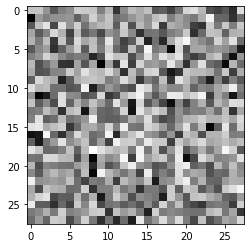

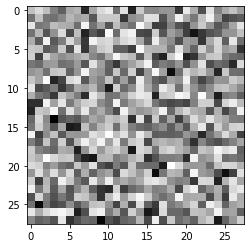

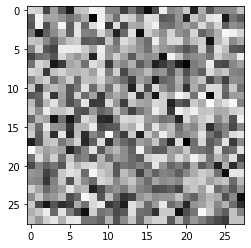

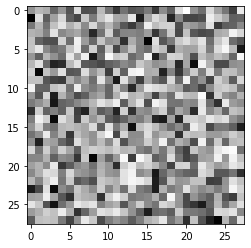

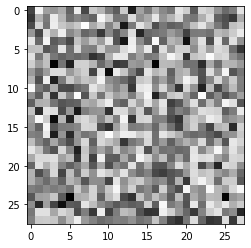

In [13]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, 'my_model/final.ckpt')
    samples = sess.run(G_sample, feed_dict={z: np.random.uniform(-1., 1., size=[5, noise_dim])})
    
    for img in samples:
        plt.imshow(img.reshape([28, 28]), cmap='Greys_r')
        plt.show()


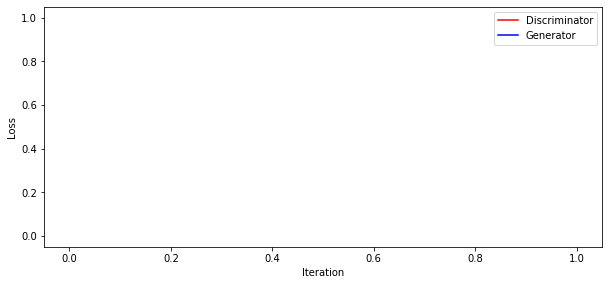

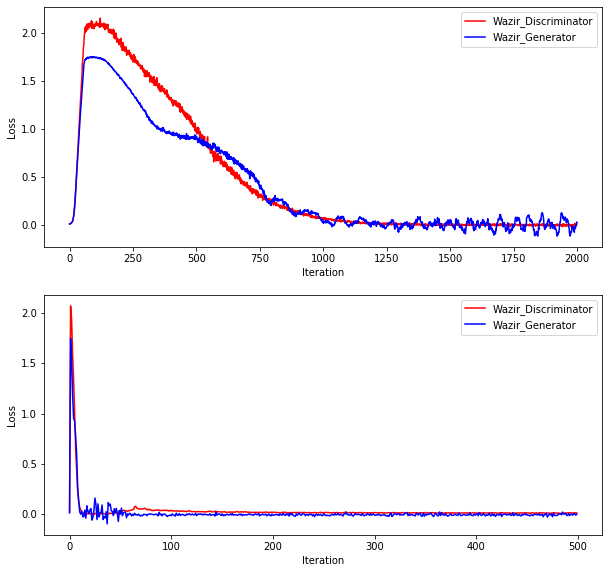

In [16]:
t = np.arange(np.array(disc_loss).shape[0])
T = np.arange(np.array(disc_loss_exp).shape[0])

plt.figure(figsize=(10,15))
plt.subplot(311)
plt.plot(t[50000:51000], np.array(disc_loss)[50000:51000], 'r-', t[50000:51000], np.array(genr_loss)[50000:51000], 'b-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend(['Discriminator', 'Generator'], loc='upper right')

plt.figure(figsize=(10,15))
plt.subplot(312)
plt.plot(t[0:2000], np.array(disc_loss)[0:2000], 'r-', t[0:2000], np.array(genr_loss)[0:2000], 'b-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend(['Wazir_Discriminator', 'Wazir_Generator'], loc='upper right')

plt.subplot(313)
plt.plot(T, np.array(disc_loss_exp), 'r-', T, np.array(genr_loss_exp), 'b-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend(['Wazir_Discriminator', 'Wazir_Generator'], loc='upper right')
plt.show()